In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, precision_score, recall_score
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('HeartAttack.csv')

In [3]:
x = df.drop(columns='num')
y = df['num']

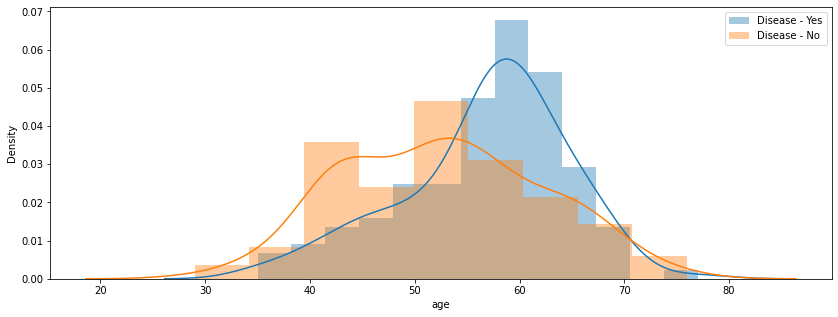

In [4]:
plt.figure(figsize=(14, 5))
sns.distplot(df[df['num'] == 1]['age'], label= "Disease - Yes")
sns.distplot(df[df['num'] == 0]['age'], label= "Disease - No")
plt.legend()

In [5]:
# split the data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## K-Nearest Neighbors (KNN)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

#Model
knnClassifier = KNeighborsClassifier(n_neighbors=5)
knnClassifier.fit(x_train,y_train)

KNeighborsClassifier()

In [8]:
y_pred_knn=knnClassifier.predict(x_test)

accuracy_knn = accuracy_score(y_pred_knn,y_test)

print("KNN accuracy : "+str(accuracy_knn))

KNN accuracy : 0.8333333333333334


# Decision Tree Classifier

In [9]:
from sklearn.tree import DecisionTreeClassifier

#Model
dtClassifier = DecisionTreeClassifier(random_state = 42)

# Train the model
dtClassifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
y_pred_dt = dtClassifier.predict(x_test)

accuracy_dt = accuracy_score(y_pred_dt,y_test)

print("Decision Tree Classifier accuracy : "+str(accuracy_dt))

Decision Tree Classifier accuracy : 0.7833333333333333


# SVM

In [11]:
from sklearn import svm
from sklearn.svm import SVC

In [12]:
# Load the Support Vector Machine Classifier
# from the Grid Search for the best parameters, we get C=4, degree=1, gamma=0.15555555555555556, kernel='poly'
svmClassifier = SVC(kernel='poly', C=4, degree=1, gamma=0.15555555555555556)   # try with different kernels
svmClassifier.fit(x_train, y_train)

SVC(C=4, degree=1, gamma=0.15555555555555556, kernel='poly')

In [13]:
y_pred_svm = svmClassifier.predict(x_test)

In [14]:
# Model Report
print("Report:",classification_report(y_test, y_pred_svm))

# Model Accuracy
print("Accuracy:",accuracy_score(y_test, y_pred_svm))

# Model Precision
print("Precision:",precision_score(y_test, y_pred_svm))

# Model Recall
print("Recall:",recall_score(y_test, y_pred_svm))

Report:               precision    recall  f1-score   support

           0       0.92      0.92      0.92        36
           1       0.88      0.88      0.88        24

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60

Accuracy: 0.9
Precision: 0.875
Recall: 0.875


In [15]:
accuracy_svm = accuracy_score(y_pred_svm, y_test)
print("SVM accuracy : "+str(accuracy_svm))

SVM accuracy : 0.9


# Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

#Model
rfClassifier = RandomForestClassifier(random_state = 42)

# Train the model
rfClassifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
y_pred_rf = rfClassifier.predict(x_test)

accuracy_rf = accuracy_score(y_pred_rf,y_test)

print("Random Forest Classifier accuracy : "+str(accuracy_rf))

Random Forest Classifier accuracy : 0.8833333333333333


# XGBoost Classifier

In [18]:
from xgboost import XGBClassifier

#Model
xgbClassifier = XGBClassifier(objective="binary:logistic", random_state=42)

# Train the model
xgbClassifier.fit(x_train, y_train)

[19:43:02] WARNING: /private/var/folders/vx/lf825gtd70s0t1_zslbtqnv40000gp/T/pip-install-bqmbglyj/xgboost_ffa6f4aec6d14c38bad17531943d7371/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=1,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [19]:
y_pred_xgb = xgbClassifier.predict(x_test)

accuracy_xgb = accuracy_score(y_pred_xgb,y_test)

print("Random Forest Classifier accuracy : "+str(accuracy_xgb))

Random Forest Classifier accuracy : 0.85


# Artificial Neural Network

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [21]:
#Creating a pipeline
model = Sequential()

#1st hidden layer with input layer
model.add(Dense(units=128,activation="relu",input_dim=13))
model.add(Dropout(0.5))

#2nd hidden layer
model.add(Dense(units=64,activation="relu",))
model.add(Dropout(0.25))

#3rd hidden layer
model.add(Dense(units=128,activation="relu",))
model.add(Dropout(0.5))

#4th hidden layer
model.add(Dense(units=64,activation="relu",input_dim=13))
model.add(Dropout(0.25))

#output layer
model.add(Dense(units=1,activation="sigmoid"))
model.add(Dropout(0.5))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

In [23]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
model_history=model.fit(x_train,y_train,validation_split=0.2,epochs=1000, batch_size=10,verbose=1)

Epoch 1/1000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-04-20 19:43:14.580198: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-04-20 19:43:14.581815: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


 1/19 [>.............................] - ETA: 4s - loss: 3.2652 - accuracy: 0.7000WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x15760cc10> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
19/19 [==============================] - 0s 6ms/step - loss: 5.9888 - accuracy: 0.4947 - val_loss: 0.6771 - val_accuracy: 0.6667
Epoch 2/1

In [25]:
y_pred_ann = model.predict(x_test)
y_pred_ann = (y_pred_ann > 0.5)

accuracy_ann=accuracy_score(y_pred_ann, y_test)
print("ANN accuracy : "+str(accuracy_ann))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
ANN accuracy : 0.8666666666666667


In [26]:
print('Confusion Matrix :', confusion_matrix(y_test, y_pred_ann))
print('Classification Report :', classification_report(y_test,y_pred_ann))

Confusion Matrix : [[33  3]
 [ 5 19]]
Classification Report :               precision    recall  f1-score   support

           0       0.87      0.92      0.89        36
           1       0.86      0.79      0.83        24

    accuracy                           0.87        60
   macro avg       0.87      0.85      0.86        60
weighted avg       0.87      0.87      0.87        60



In [27]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

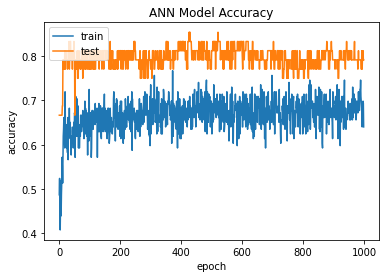

In [28]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('ANN Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

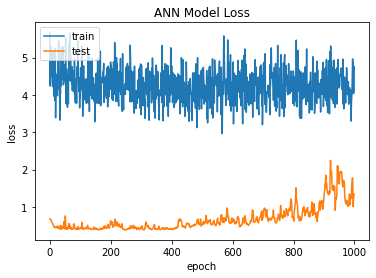

In [29]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('ANN Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

## Results

In [30]:
accuracy = [accuracy_knn, accuracy_dt, accuracy_svm, accuracy_rf, accuracy_xgb, accuracy_ann]
models = ["K-Nearest Neighbors","Decision Tree","Support Vector Machine","Random Forest","XGBoost", "Artificial Neural Network"]    

for i in range(len(models)):
    print("The achieved accuracy of "+models[i]+" is: "+str(accuracy[i]))

The achieved accuracy of K-Nearest Neighbors is: 0.8333333333333334
The achieved accuracy of Decision Tree is: 0.7833333333333333
The achieved accuracy of Support Vector Machine is: 0.9
The achieved accuracy of Random Forest is: 0.8833333333333333
The achieved accuracy of XGBoost is: 0.85
The achieved accuracy of Artificial Neural Network is: 0.8666666666666667


Text(0, 0.5, 'Accuracy')

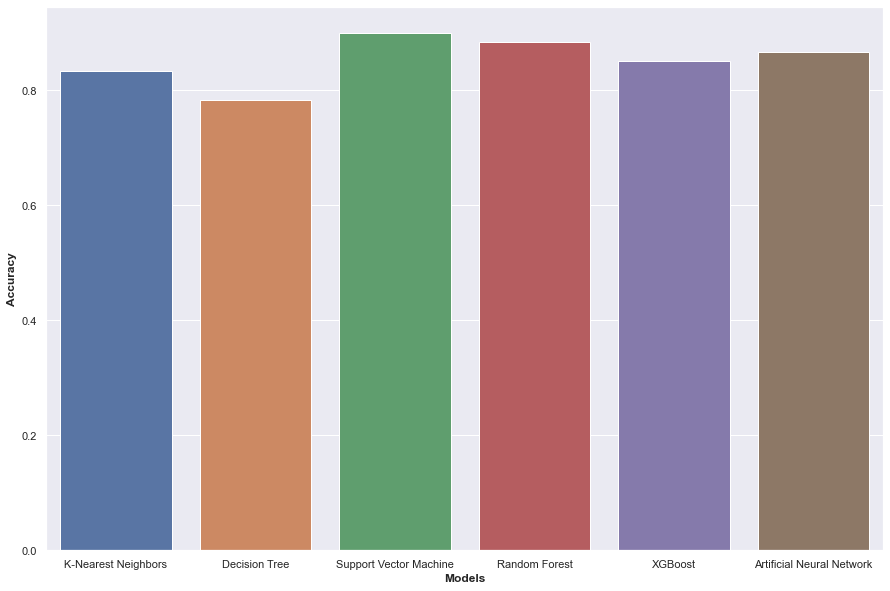

In [31]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(models,accuracy)
plt.xlabel("Models", fontweight="bold")
plt.ylabel("Accuracy", fontweight="bold")

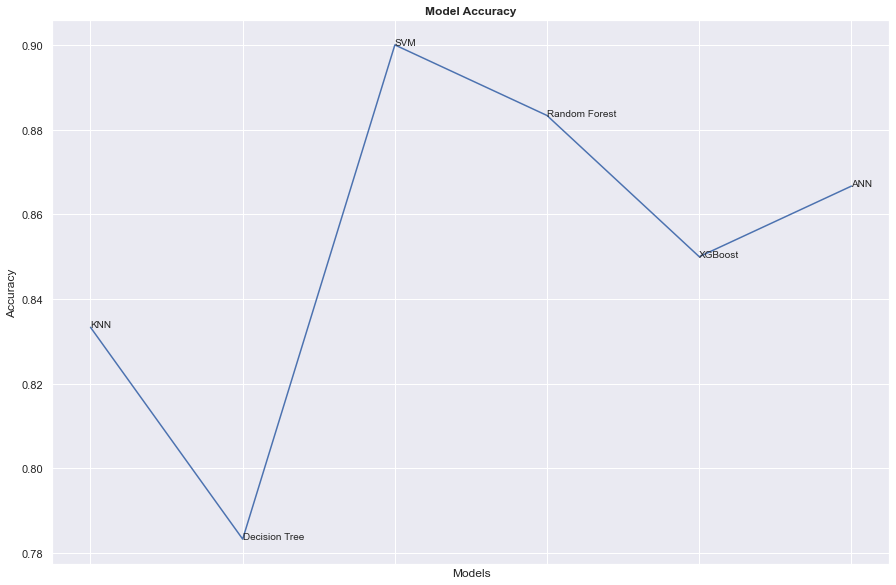

In [32]:
plt.figure(figsize =(15,10))
plt.rcParams["font.size"] = 10

plt.plot(accuracy)
accuracy = list(enumerate(accuracy))
plt.annotate("KNN", accuracy[0])
plt.annotate("Decision Tree", accuracy[1])
plt.annotate("SVM", accuracy[2])
plt.annotate("Random Forest", accuracy[3])
plt.annotate("XGBoost", accuracy[4])
plt.annotate("ANN", accuracy[5])

plt.tick_params(bottom=False, labelbottom=False)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy", fontweight="bold")

plt.show()